In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [28]:
df=pd.read_csv("salary_cleaned_data.csv")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,eprovided,min salary,max salary,avg salary,company_txt,state,same_state,age,py_yn,r_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n3.8,NM,0,50,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n3.4,MD,0,39,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n4.8,FL,1,13,1,0,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n3.8,WA,1,58,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n2.9,NY,1,25,1,0,0,1
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71,119,95.0,CyrusOne\n3.4,TX,1,23,1,0,1,1
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,0,0,54,93,73.5,ClearOne Advantage\n4.1,MD,1,15,0,0,0,1
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,0,0,86,142,114.0,Logic20/20\n3.8,CA,0,18,1,0,1,1
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,0,0,38,84,61.0,Rochester Regional Health\n3.3,NY,1,9,0,0,0,0
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,0,120,160,140.0,<intent>\n4.6,NY,1,14,1,0,0,0


In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'eprovided', 'min salary', 'max salary', 'avg salary',
       'company_txt', 'state', 'same_state', 'age', 'py_yn', 'r_yn', 'aws_yn',
       'excel_yn'],
      dtype='object')

In [30]:
def title_simplifer(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "machine learning" in title.lower():
        return "machine learning"
    elif "manager" in title.lower():
        return "manager"
    else:
        return "NA"
    
def senority(title):
    if "sr" in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
        return 'senior'
    elif 'jr.' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else:
        return "NA"
    
    

In [31]:
df['job_simplified']=df["Job Title"].apply(title_simplifer)
df['job_simplified'].value_counts()

NA                  300
data scientist      279
data engineer       119
manager              22
machine learning     22
Name: job_simplified, dtype: int64

In [32]:
df['senority']=df["Job Title"].apply(senority)
df['senority'].value_counts()

NA        520
senior    220
jr          2
Name: senority, dtype: int64

In [33]:
df['state']=df['state'].apply(lambda x: x.strip() if x.strip().lower()!= "los angeles" else "CA")
df["state"].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: state, dtype: int64

In [34]:
#'Competitors count
df['Competitors count']=df['Competitors'].apply(lambda x: len(x.split(",")) if x !='-1' else 0)
df['Competitors count']
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [35]:
#hourly wage into annual wage

df['min salary']=df.apply(lambda x: x['min salary']*2 if x.hourly==1 else x['min salary'], axis=1)
df['max salary']=df.apply(lambda x: x['max salary']*2 if x.hourly==1 else x['max salary'], axis=1)

In [37]:
df[df.hourly==1][['hourly','min salary','max salary']]

,hourly,min salary,max salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [38]:
#remove new line character from the company txt

df['company_txt']=df['company_txt'].apply(lambda x: x.replace("\n",""))
df['company_txt']

0                                   Tecolote Research3.8
1               University of Maryland Medical System3.4
2                                             KnowBe44.8
3                                                PNNL3.8
4                                  Affinity Solutions2.9
5                                            CyrusOne3.4
6                                  ClearOne Advantage4.1
7                                          Logic20/203.8
8                           Rochester Regional Health3.3
9                                            <intent>4.6
10                                               Wish3.5
11                                            ManTech4.1
12                                            Walmart3.2
13                                             Yesler4.1
14                             Takeda Pharmaceuticals3.7
15                                            Audible3.6
16                                Blueprint Medicines3.9
17                             

In [39]:
df.describe()

,Rating,Founded,hourly,eprovided,min salary,max salary,avg salary,same_state,age,py_yn,r_yn,aws_yn,excel_yn,Competitors count
count,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.0,74.719677,128.149596,100.626011,0.557951,49.389488,0.528302,0.001348,0.237197,0.522911,1.053908
std,0.801210,497.183763,0.177034,0.0,30.980593,45.220324,38.855948,0.496965,53.962906,0.499535,0.036711,0.425651,0.499812,1.384239
min,-1.000000,-1.000000,0.000000,0.0,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.0,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.0,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.0,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,0.000000,1.000000,3.000000
max,5.000000,2019.000000,1.000000,0.0,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,4.000000


<Axes: >

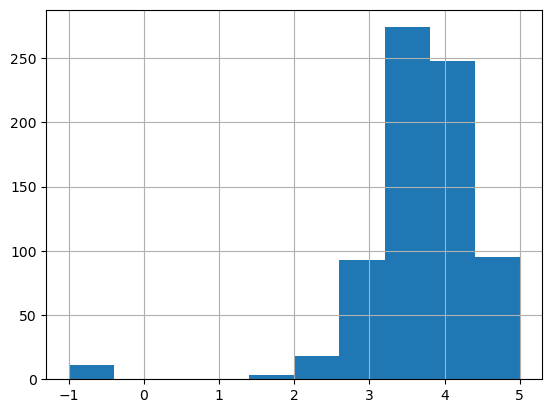

In [42]:
df.Rating.hist()

<Axes: >

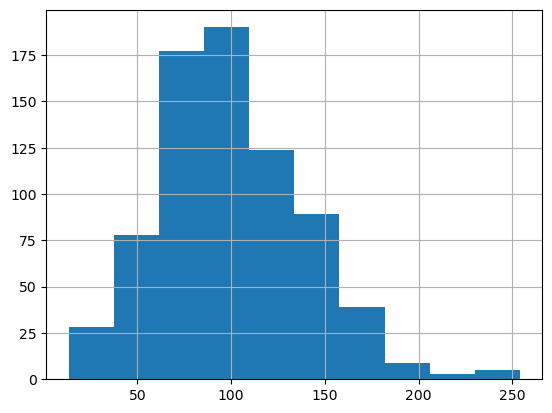

In [43]:
df['avg salary'].hist()

<Axes: >

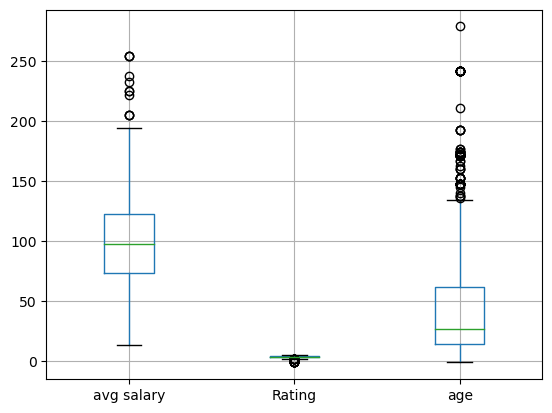

In [50]:
df.boxplot(column=["avg salary","Rating","age"])

In [51]:
df[["avg salary","Rating","age"]].corr()

,avg salary,Rating,age
avg salary,1.000000,0.013492,0.019410
Rating,0.013492,1.000000,0.026164
age,0.019410,0.026164,1.000000


<Axes: >

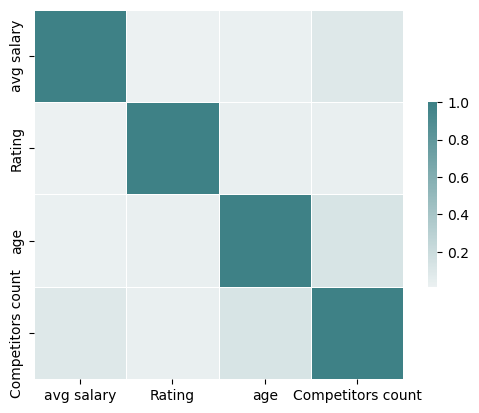

In [67]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df[["avg salary","Rating","age",'Competitors count']].corr(),cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [79]:
df_cat=df[['Location', 'Headquarters', 'Size', 'Founded','company_txt', 'state', 'same_state','py_yn', 'r_yn', 'aws_yn',
       'excel_yn','Competitors count', 'Sector', 'Revenue']]

Graph of Location with total count:200


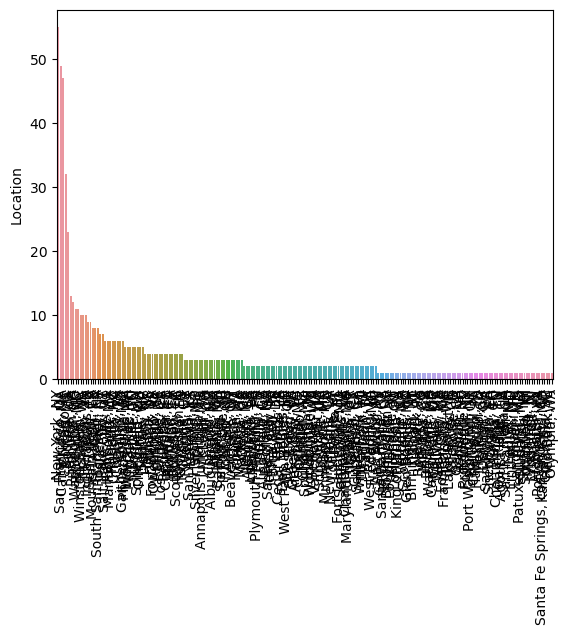

Graph of Headquarters with total count:198


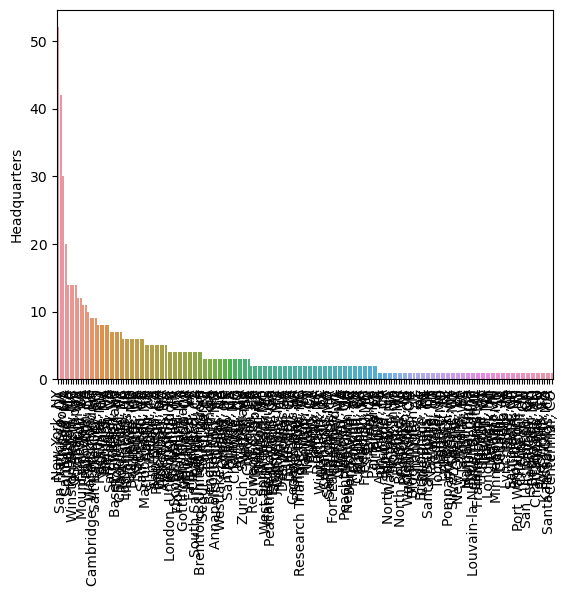

Graph of Size with total count:9


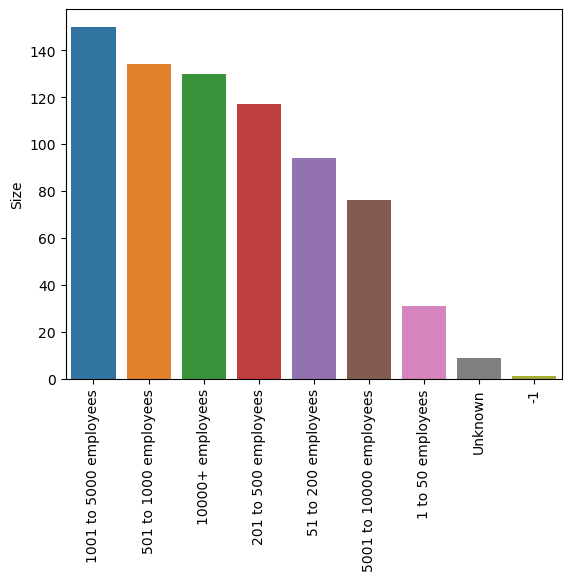

Graph of Founded with total count:102


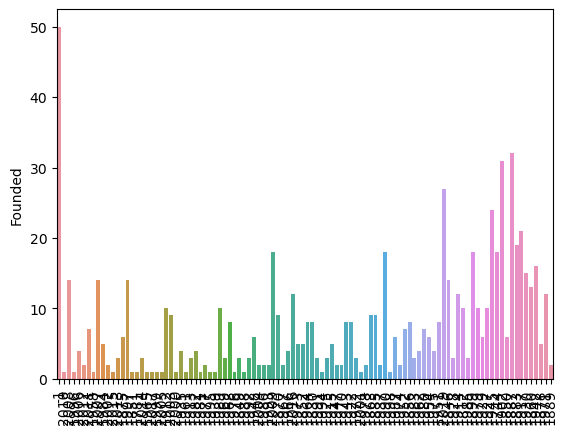

Graph of company_txt with total count:343


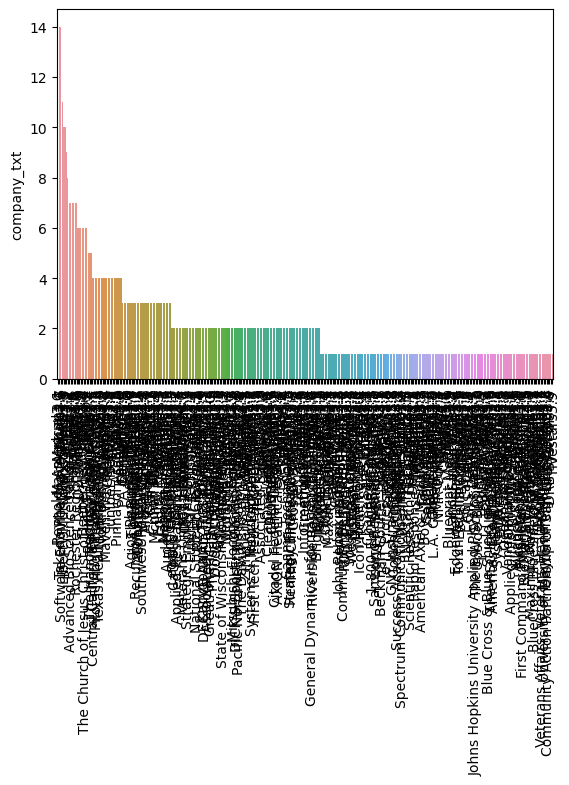

Graph of state with total count:37


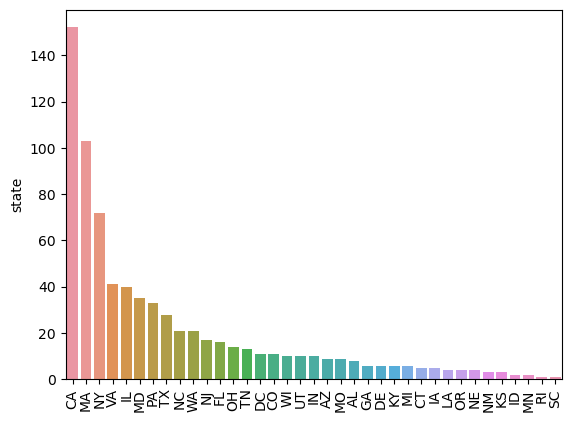

Graph of same_state with total count:2


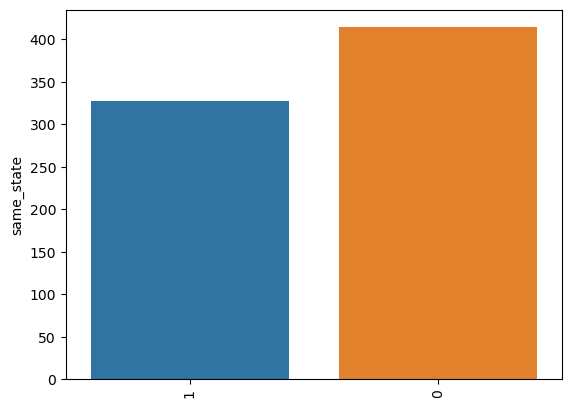

Graph of py_yn with total count:2


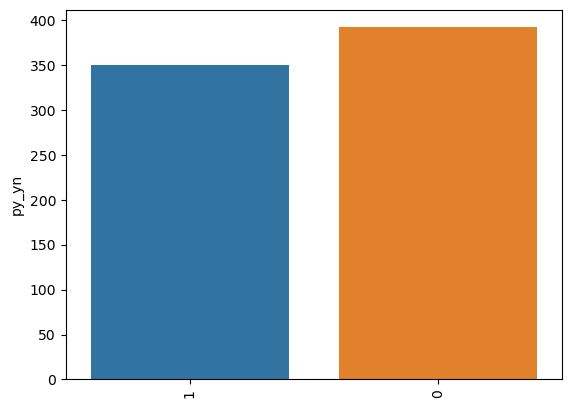

Graph of r_yn with total count:2


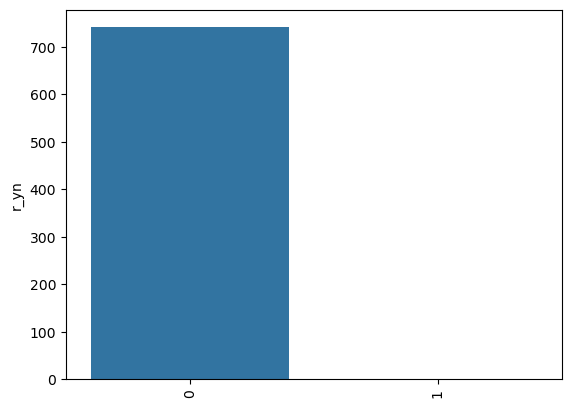

Graph of aws_yn with total count:2


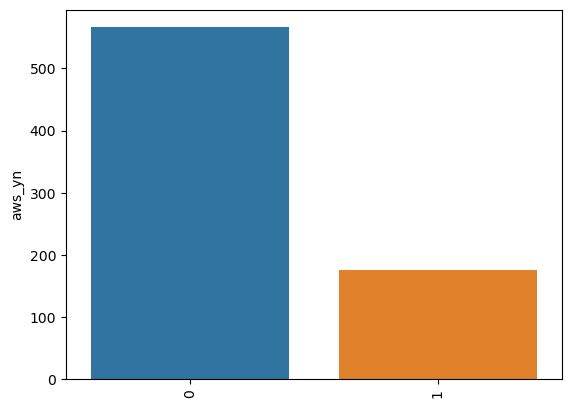

Graph of excel_yn with total count:2


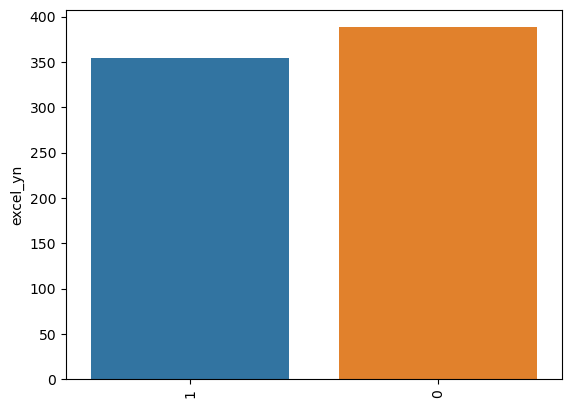

Graph of Competitors count with total count:5


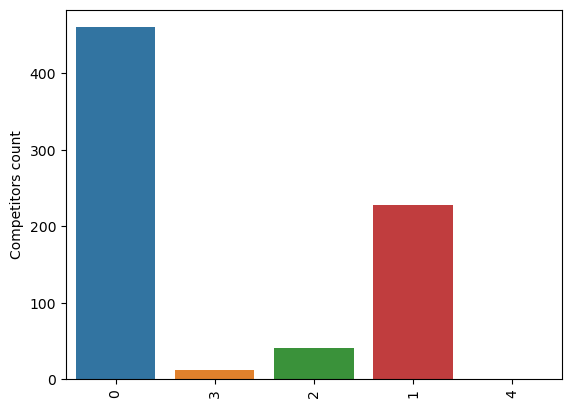

Graph of Sector with total count:25


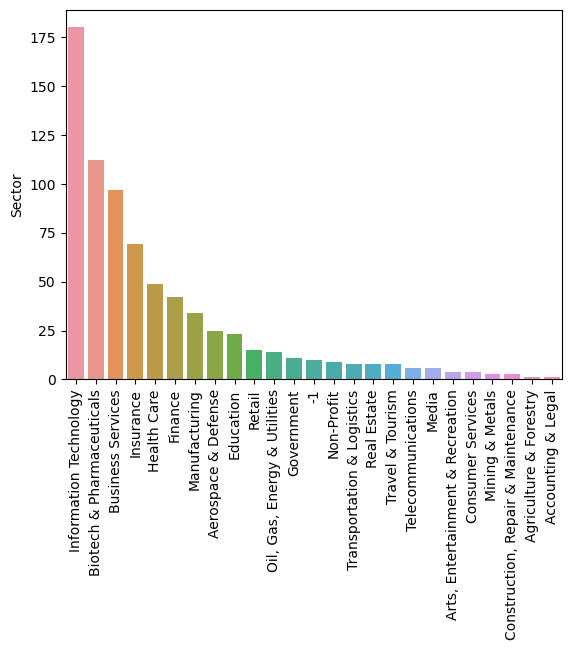

Graph of Revenue with total count:14


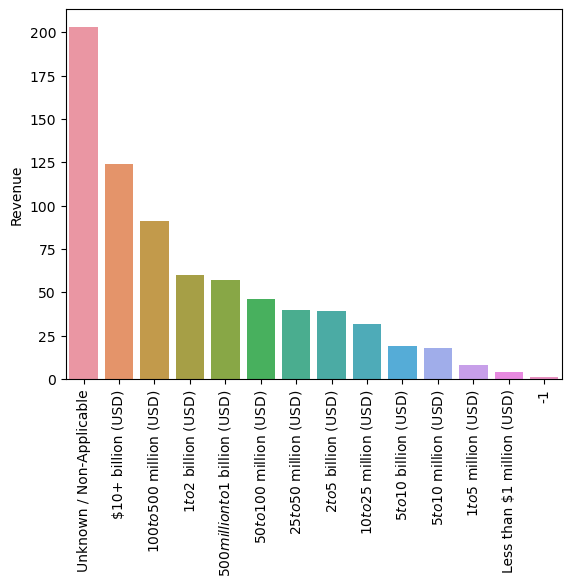

In [80]:
for i in df_cat:
    num=df_cat[i].value_counts()
    print("Graph of %s with total count:%d" %(i,len(num)))
    graph=sns.barplot(x=num.index,y=num)
    graph.set_xticklabels(labels=num.index, rotation=90)
    plt.show()

Graph of Location with total count:25


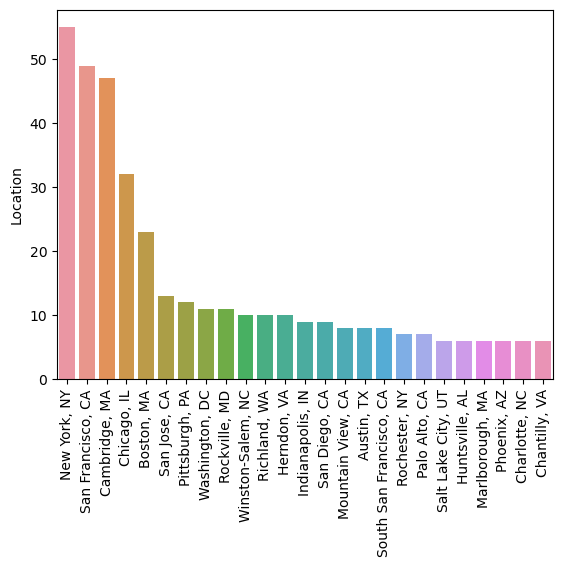

Graph of Headquarters with total count:25


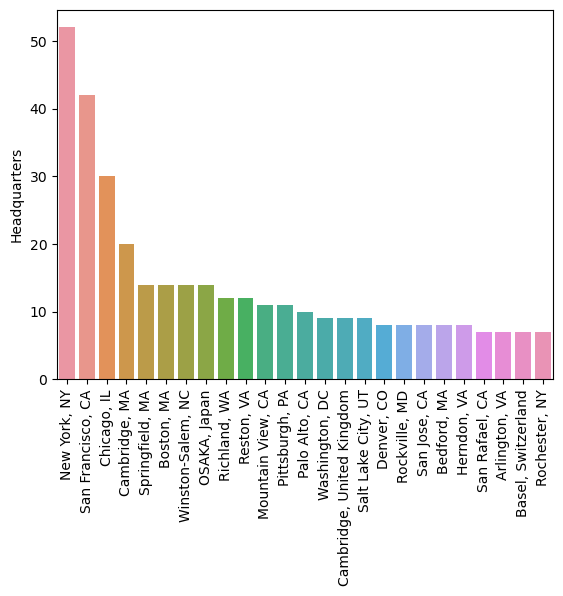

Graph of company_txt with total count:25


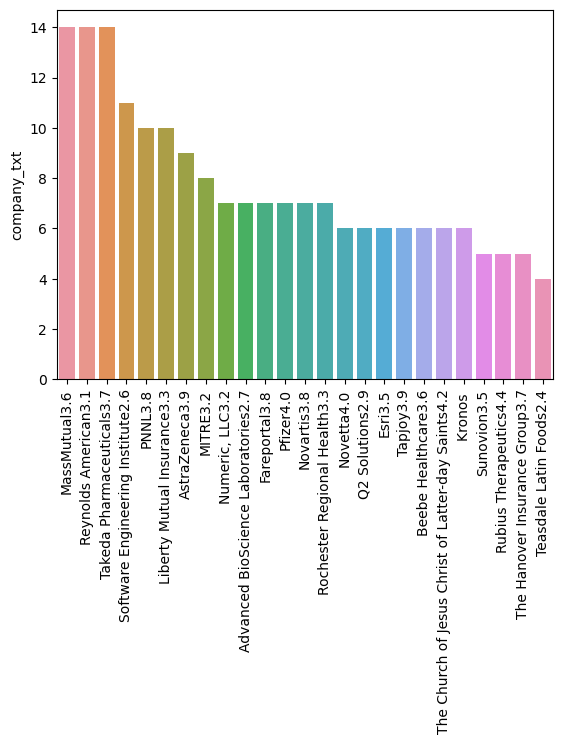

Graph of Founded with total count:25


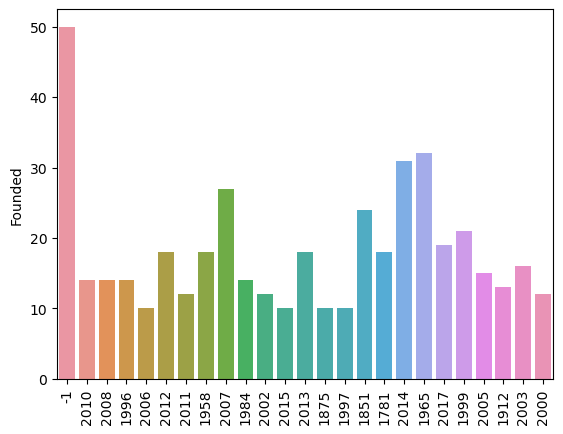

In [85]:
for i in df_cat[['Location', 'Headquarters','company_txt', 'Founded']].columns:
    num=df_cat[i].value_counts()[:25]
    print("Graph of %s with total count:%d" %(i,len(num)))
    graph=sns.barplot(x=num.index,y=num)
    graph.set_xticklabels(labels=num.index, rotation=90)
    plt.show()

In [87]:
pd.pivot_table(df, index="job_simplified", values="avg salary")

,avg salary
job_simplified,
NA,82.303333
data engineer,105.403361
data scientist,117.564516
machine learning,126.431818
manager,84.022727


In [89]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'eprovided', 'min salary', 'max salary', 'avg salary',
       'company_txt', 'state', 'same_state', 'age', 'py_yn', 'r_yn', 'aws_yn',
       'excel_yn', 'job_simplified', 'senority', 'Competitors count'],
      dtype='object')

In [96]:
pd.pivot_table(df, index=["state","job_simplified"], values="avg salary",aggfunc="count").sort_values("state",ascending=False)

avg salary
state job_simplified              
WI    data scientist             3
      NA                         7
WA    data scientist            17
      NA                         4
VA    machine learning           2
      data scientist            18
      data engineer             10
      NA                        11
UT    NA                         4
      data engineer              3
      data scientist             3
TX    data scientist            13
      data engineer              8
      NA                         7
TN    data scientist             1
      data engineer             10
      NA                         2
SC    NA                         1
RI    NA                         1
PA    data scientist             6
      NA                        16
      data engineer              1
      machine learning           7
      manager                    3
OR    data scientist             3
      data engineer              1
OH    data scientist             7
      NA                         7
NY    machine learning           2
      data scientist            40
      data engineer              4
      NA                        26
NM    data scientist             3
NJ    data engineer              2
      NA                         9
      manager                    2
      data scientist             4
NE    NA                         4
NC    data scientist             3
      data engineer              6
      NA                        12
MO    manager                    1
      data scientist             3
      NA                         5
MN    data engineer              1
      NA                         1
MI    manager                    2
      data scientist             4
MD    data scientist            13
      data engineer              3
      NA                        19
MA    manager                    5
      data scientist            30
      data engineer             12
      NA                        56
LA    data engineer              2
      NA                         2
KY    NA                         4
      data scientist             2
KS    machine learning           3
IN    data scientist             2
      data engineer              4
      NA                         4
IL    machine learning           2
      data scientist            15
      data engineer              8
      NA                        15
ID    NA                         2
IA    data engineer              3
      NA                         2
GA    NA                         3
      data scientist             3
FL    data engineer              3
      NA                         6
      data scientist             7
DE    NA                         6
DC    data scientist             5
      data engineer              4
      NA                         2
CT    NA                         3
      data scientist             2
CO    data engineer              3
      NA                         4
      machine learning           1
      data scientist             3
CA    manager                    9
      machine learning           5
      data scientist            68
      data engineer             25
      NA                        45
AZ    data scientist             1
      NA                         3
      data engineer              5
AL    data engineer              1
      NA                         7

In [100]:
pd.pivot_table(df[df.job_simplified=="data scientist"], index="state", values="avg salary").sort_values("avg salary",ascending=False)

,avg salary
state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000
